In [1]:
!pip install matplotlib

In [2]:
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print("Number of train images : ", x_train.shape[0])
print("Number of test images : ", x_test.shape[0])

print ("Number of channels : ", x_train.shape[3])
print("Image size : ", x_train.shape[1], x_train.shape[2])

class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배','트럭' ]

Number of train images :  50000
Number of test images :  10000
Number of channels :  3
Image size :  32 32


In [5]:
!apt install fonts-nanum-coding

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=path)

In [6]:
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 10
if y_test.shape[1] == 1:
  x_train = x_train/255.
  x_test = x_test/255.
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)

C:\Users\User\.conda\envs\tensor210py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tensor210py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tensor210py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tensor210py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tensor210py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from curr

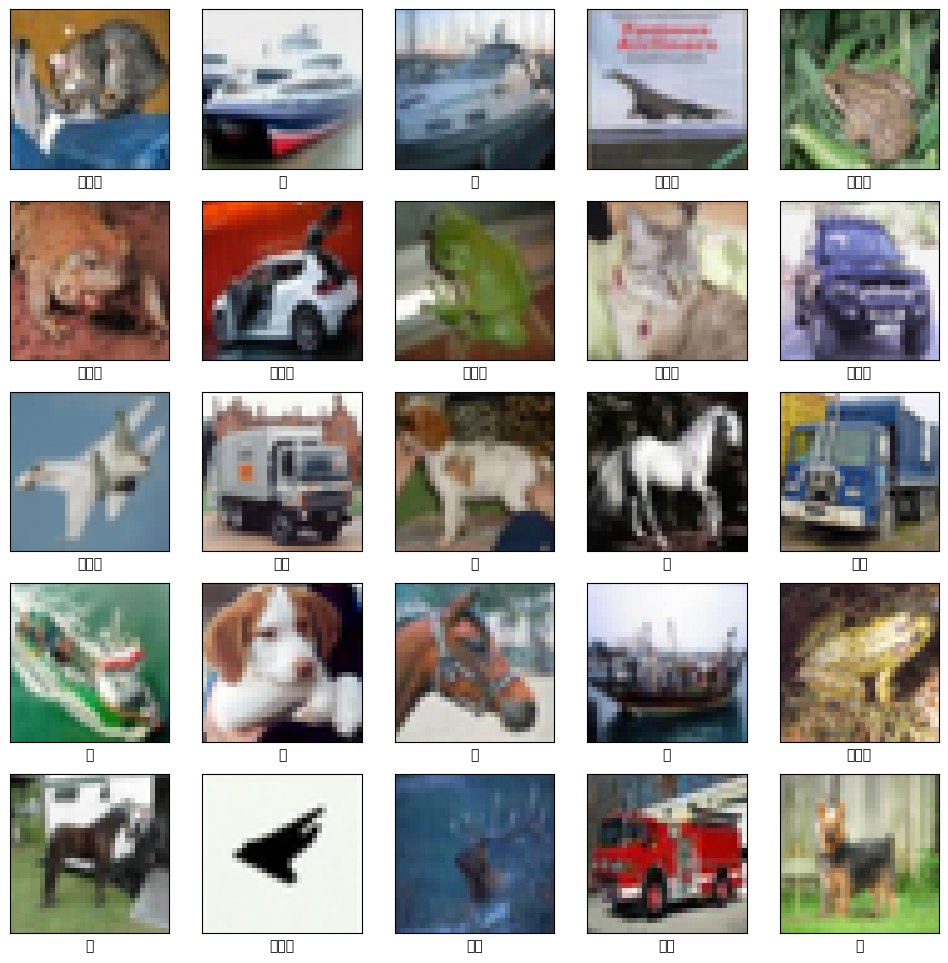

In [8]:
from matplotlib.offsetbox import FontProperties
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
#   plt.xlabel(class_names[y_test[i].argmax()], fontproperties=fontprop)
  plt.xlabel(class_names[y_test[i].argmax()])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4729 - accuracy: 0.4646 - val_loss: 1.2234 - val_accuracy: 0.5460
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0723 - accuracy: 0.6220 - val_loss: 0.9801 - val_accuracy: 0.6562
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9043 - accuracy: 0.6820 - val_loss: 0.9710 - val_accuracy: 0.6681
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7942 - accuracy: 0.7237 - val_loss: 0.8289 - val_accuracy: 0.7136
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7110 - accuracy: 0.7503 - val_loss: 0.8382 - val_accuracy: 0.7140
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6443 - accuracy: 0.7737 - val_loss: 0.8497 - val_accuracy: 0.7081
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5850 - accuracy: 0.7950 - val_loss: 0.8216 - val_accuracy:

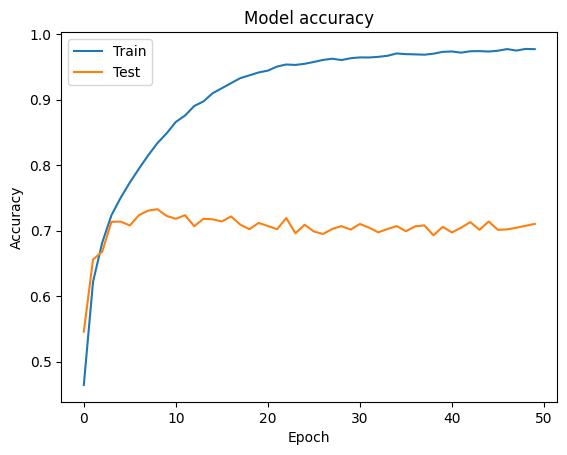

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

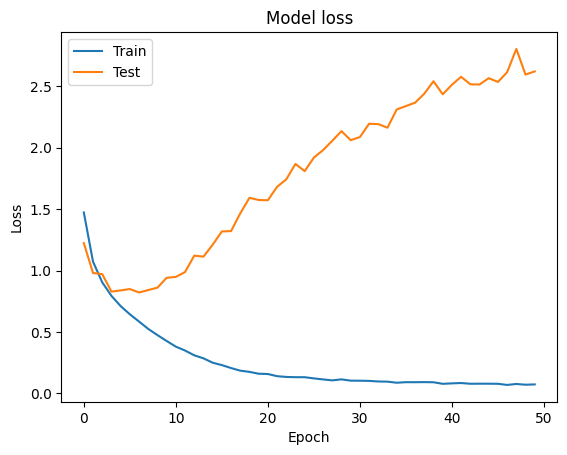

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [24]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4467 - accuracy: 0.4736 - val_loss: 1.1358 - val_accuracy: 0.5948
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9505 - accuracy: 0.6613 - val_loss: 0.9032 - val_accuracy: 0.6812
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7533 - accuracy: 0.7356 - val_loss: 0.8009 - val_accuracy: 0.7236
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6203 - accuracy: 0.7810 - val_loss: 0.7493 - val_accuracy: 0.7472
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5022 - accuracy: 0.8226 - val_loss: 0.7858 - val_accuracy: 0.7532
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4122 - accuracy: 0.8536 - val_loss: 0.8309 - val_accuracy: 0.7456
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3225 - accuracy: 0.8860 - val_loss: 0.8683 - val_accuracy:

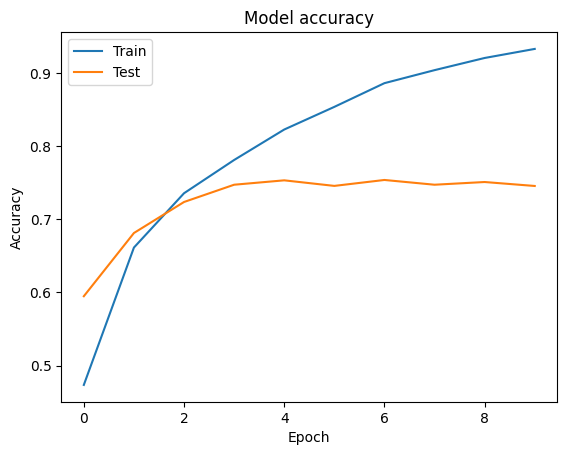

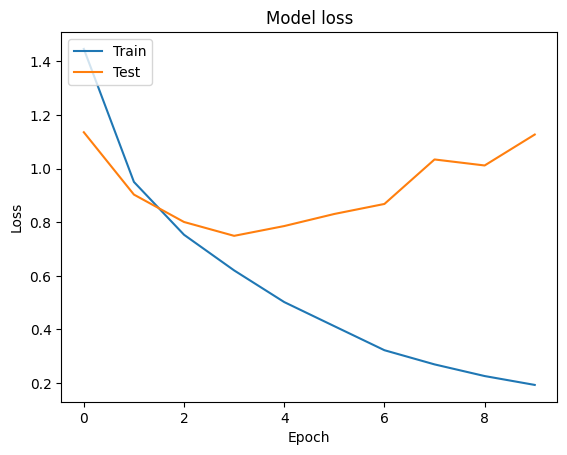

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()